In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from darts import TimeSeries
from darts.metrics import mse
from darts.models import ExponentialSmoothing

# Import processing functions
from londonbss.ml_logic.loadprocessing import get_processed_data

%matplotlib inline

The `LightGBM` module could not be imported. To enable LightGBM support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md


In [3]:
file_path = '../../../raw_data/processed/'
station_name = 'norton_folgate__liverpool_street'

In [4]:
df = get_processed_data(min_date='2020-01-01', max_date='2023-06-19',station=station_name)


 ⭐️ Use case: preprocess

Load data from local CSV...
Data loaded, with shape (30793839, 4)
✅ Data cleaned
✅ Balance matrix created


/home/sebasmar/code/elsebasmar/london-bss/londonbss/ml_logic/features.py:48: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  london_events_filtered['start_date']=pd.to_datetime(london_events_filtered['start_date'])
/home/sebasmar/code/elsebasmar/london-bss/londonbss/ml_logic/features.py:49: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  london_events_filtered['end_date']=pd.to_datetime(london_events_filtered['end_date'])


✅ Raw features adquired.

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_trips_full_data_4...:
✅ Data saved to bigquery, with shape (30297, 851)

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_features_full_data_4...:
✅ Data saved to bigquery, with shape (31152, 23)

⭐️ Processing Data Starting ...

Loading preprocessed data...

Load data from BigQuery server...

Load data from local CSV...
Data loaded, with shape (30297, 852)

Load data from local CSV...
Data loaded, with shape (31129, 24)

Staring processing data...
✅ Processing done

Save data to BigQuery @ wagon-bootcamp-396316.londonbss.processed_all_norton_folgate__liverpool_street_full_data_4...:
✅ Data saved to bigquery, with shape (30361, 24)

✅ Processed data loaded to BG Done

⭐️ Getting processed Data...

Load data from BigQuery server...
Data loaded, with shape (30360, 25)

Processed data loaded and a copy was saved locally


In [5]:
df= pd.read_csv(file_path+f'processed_all_{station_name}_2020-01-01_2023-06-19_full_data_4.csv')

In [6]:
df['startdate'] = pd.to_datetime(df['startdate']).dt.tz_localize(None)

In [7]:
df.dtypes

startdate                           datetime64[ns]
elisabeth_line                             float64
lockdown                                   float64
strike                                     float64
school_holidays                            float64
daytime                                    float64
London_zone_Central                        float64
London_zone_North                          float64
London_zone_West                           float64
London_zone_South_West                     float64
London_zone_South_East                     float64
London_zone_East                           float64
Event                                      float64
temperature                                float64
rainfall                                   float64
snowfall                                   float64
cloudcover                                 float64
wind_speed                                 float64
wind_direction                             float64
year                           

In [8]:
series = TimeSeries.from_dataframe(df, time_col='startdate', value_cols=station_name,
                                   fill_missing_dates=True, freq='H', fillna_value=0)

<Axes: xlabel='startdate'>

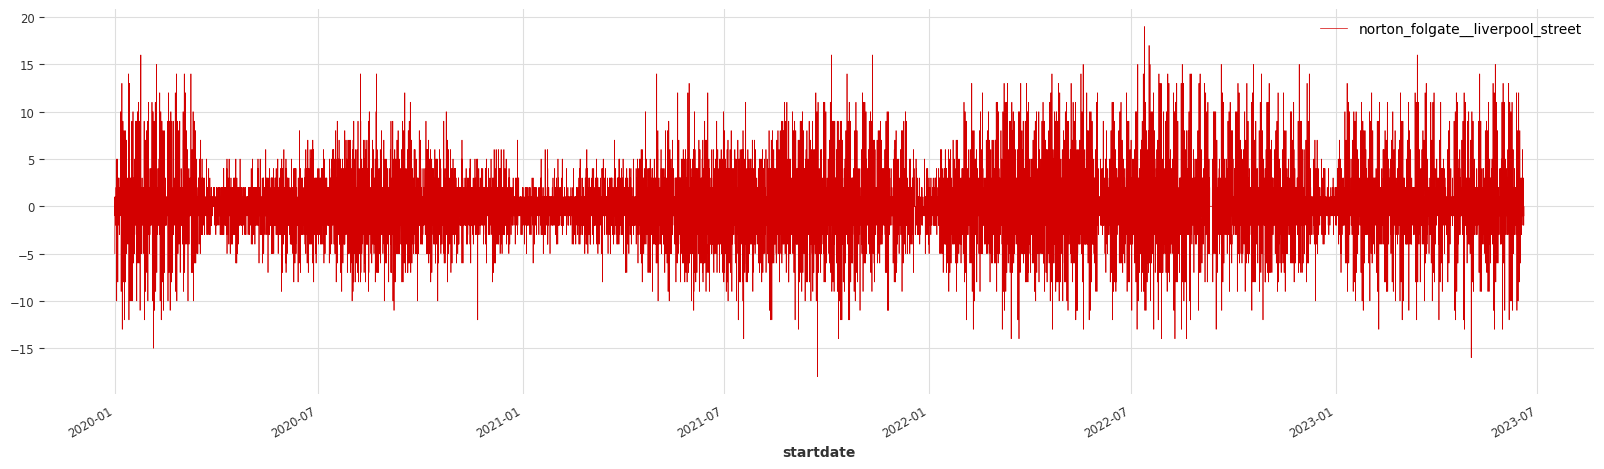

In [9]:
plt.figure(figsize=(20, 5))
series.plot(c='#D30000',linewidth=0.5)

In [10]:
model_es = ExponentialSmoothing(trend=None, seasonal_periods=24*7, method='TNC', optimized=True)

In [11]:
model_es.fit(series)

ExponentialSmoothing(trend=None, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=168, random_state=0, method=TNC, optimized=True)

In [12]:
pred_es = model_es.predict(n=168)

<Axes: xlabel='startdate'>

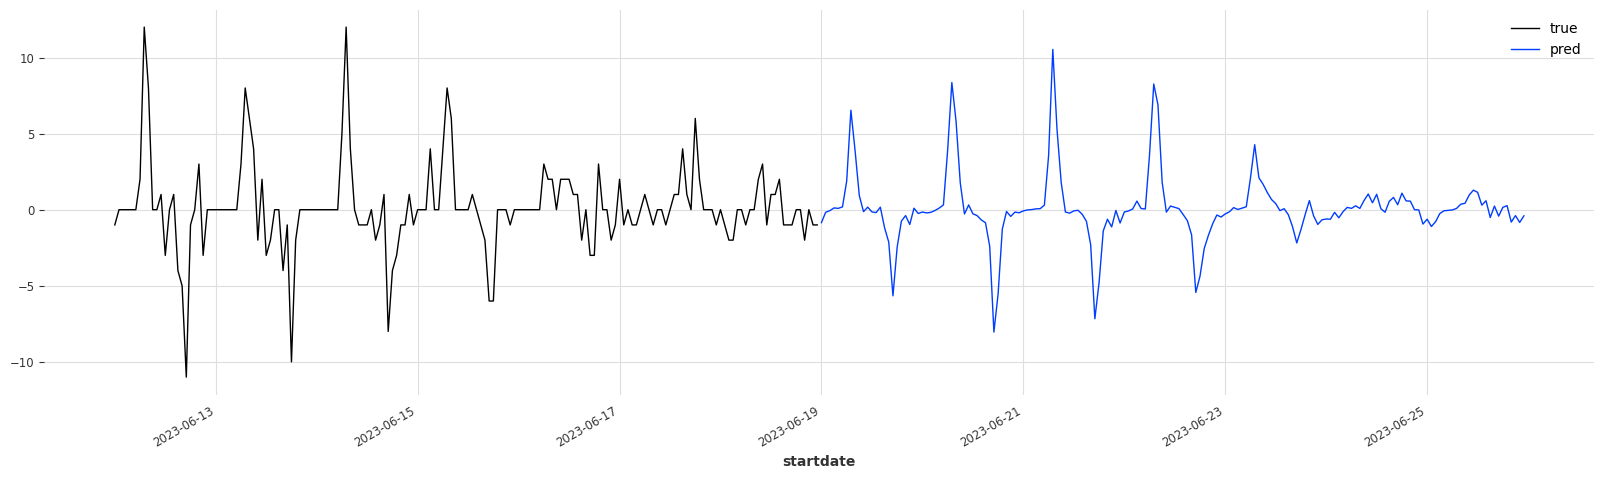

In [14]:
plt.figure(figsize=(20, 5))
series[-168:].plot(linewidth=1, label="true")
pred_es.plot(linewidth=1, label="pred")

In [15]:
from londonbss.ml_logic.registry import save_model

In [16]:
save_model(model_es,station_name)

✅ Model saved locally
✅ Model saved to GCS
